# 5. K Neighbors Classifier

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [242]:
df = pd.read_csv("Heart_limpio.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,3.0,140.0,289.0,0.0,1.0,172.0,0.0,0.0,2.0,0.0
1,49.0,0.0,1.0,160.0,180.0,0.0,1.0,156.0,0.0,1.0,1.0,1.0
2,37.0,1.0,3.0,130.0,283.0,0.0,2.0,98.0,0.0,0.0,2.0,0.0
3,48.0,0.0,2.0,138.0,214.0,0.0,1.0,108.0,1.0,1.5,1.0,1.0
4,54.0,1.0,1.0,150.0,195.0,0.0,1.0,122.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1.0,4.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,1.0
914,68.0,1.0,2.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,1.0
915,57.0,1.0,2.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0
916,57.0,0.0,3.0,130.0,236.0,0.0,3.0,174.0,0.0,0.0,1.0,1.0


# Separamos la variable target

In [243]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [244]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

y = df["HeartDisease"]


# Creamos nuestro modelo

### Separamos los datos en Train y Test

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

### Escalamos los datos (0,1)

In [247]:
from sklearn.preprocessing import MinMaxScaler

In [248]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creamos el modelo

In [249]:
from sklearn.neighbors import KNeighborsClassifier

In [250]:
modelo = KNeighborsClassifier()
modelo.fit(X_train, y_train)

KNeighborsClassifier()

<h3>Comprobamos el error en Train y en Test

In [251]:
print("Accuracy train", modelo.score(X_train, y_train))
print("El modelo 1 tiene un",round(100*modelo.score(X_test,y_test),2),"%","de acierto.")

Accuracy train 0.883177570093458
El modelo 1 tiene un 85.14 % de acierto.


# Sacamos el mejor valor de K

In [252]:
k_range = range(1,40)
scores = []

for k in k_range:
    modelo_2 = KNeighborsClassifier(k)
    modelo_2.fit(X_train,y_train)
    scores.append(modelo_2.score(X_test,y_test))

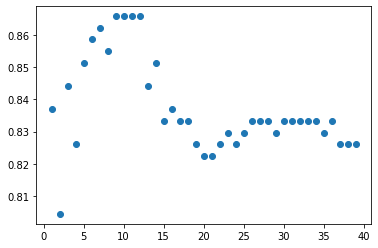

In [253]:
plt.scatter(k_range,scores);

### Los mejores valores para K son 9, 10, 11 y 12

In [254]:
np.array(k_range)[scores == max(scores)]

array([ 9, 10, 11, 12])

### Los 4 valores nos dan la misma puntuación, así que elegimos el primero por ejemplo.

In [255]:
modelo_2 = KNeighborsClassifier(n_neighbors=9)
modelo_2.fit(X_train,y_train)
print("El modelo 2 tiene un",round(100*modelo_2.score(X_test,y_test),2),"%","de acierto.")

El modelo 2 tiene un 86.59 % de acierto.


# Probamos un Cross Validation

In [256]:
from sklearn.model_selection import cross_val_score, KFold

In [257]:
modelo_3 = KNeighborsClassifier(n_neighbors=9)

In [258]:
kfold = KFold(10, shuffle=True, random_state=1)
results_cv = cross_val_score(modelo_3, scaler.fit_transform(X), y, cv=kfold, scoring='accuracy')

In [259]:
results_cv

array([0.91304348, 0.90217391, 0.81521739, 0.77173913, 0.81521739,
       0.84782609, 0.88043478, 0.88043478, 0.8021978 , 0.83516484])

### Con 10 divisiones nos da una media de acierto del 84,53 %

In [260]:
results_cv.mean()

0.8463449593884376

In [261]:
results_cv.std()

0.04412463902224452

In [262]:
from sklearn.model_selection import GridSearchCV

modelo_4 = KNeighborsClassifier()

parameters ={'n_neighbors': range(1,40)
}

clf = GridSearchCV(modelo_4, parameters, cv=kfold, scoring='accuracy')

In [263]:
clf.fit(scaler.fit_transform(X),y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)}, scoring='accuracy')

In [264]:
clf.best_params_

{'n_neighbors': 5}

In [265]:
clf.best_estimator_

KNeighborsClassifier()

In [266]:
clf.best_score_

0.8539894887720975

In [267]:
print("El modelo 2 (con 9 n_neighbors) tiene un",round(100*modelo_2.score(X_test,y_test),2),"%","de acierto.")

El modelo 2 (con 9 n_neighbors) tiene un 86.59 % de acierto.
